___


# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

## Read Data

In [2]:
ad_data=pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
ad_data.corr()['Clicked on Ad']

Daily Time Spent on Site   -0.748117
Age                         0.492531
Area Income                -0.476255
Daily Internet Usage       -0.786539
Male                       -0.038027
Clicked on Ad               1.000000
Name: Clicked on Ad, dtype: float64

In [7]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

### Searching for a categorical column in Object type columns

#### Pattern search in 'Ad Topic Line' column

**Number of words in 'Ad Topic Line' column**

In [8]:
ad_data['Ad Topic Line'].apply(lambda x:len(x.split())).nunique()

4

In [9]:
ad_data['Ad Topic Line'].apply(lambda x:len(x.split())).value_counts()

3    812
4    158
5     29
6      1
Name: Ad Topic Line, dtype: int64

**First word in 'Ad Topic Line' column**

In [10]:
ad_data['Ad Topic Line'].apply(lambda x:x.split()[0]).value_counts()

Front-line           20
Configurable         17
Managed              15
Pre-emptive          15
Balanced             15
                     ..
Devolved              6
Multi-lateral         5
Profit-focused        4
Re-contextualized     4
Persistent            4
Name: Ad Topic Line, Length: 100, dtype: int64

**Second word in 'Ad Topic Line' column**

In [11]:
ad_data['Ad Topic Line'].apply(lambda x:x.split()[1]).value_counts()

zero             22
asynchronous     17
5thgeneration    16
coherent         16
intangible       16
                 ..
web-enabled       6
composite         6
needs-based       5
eco-centric       5
static            4
Name: Ad Topic Line, Length: 100, dtype: int64

**Third word in 'Ad Topic Line' column**

In [12]:
ad_data['Ad Topic Line'].apply(lambda x:x.split()[2]).value_counts()

success            16
hierarchy          16
system             16
application        15
open               14
                   ..
process             4
product             4
functionalities     4
projection          4
matrices            3
Name: Ad Topic Line, Length: 106, dtype: int64

**No similarity in 'Ad Topic Line' entries**

#### 'City' and 'Country' column

In [13]:
ad_data['City'].nunique()

969

In [14]:
ad_data['Country'].nunique()

237

**No categorical columns found**

## Exploratory Data Analysis


<AxesSubplot:ylabel='Frequency'>

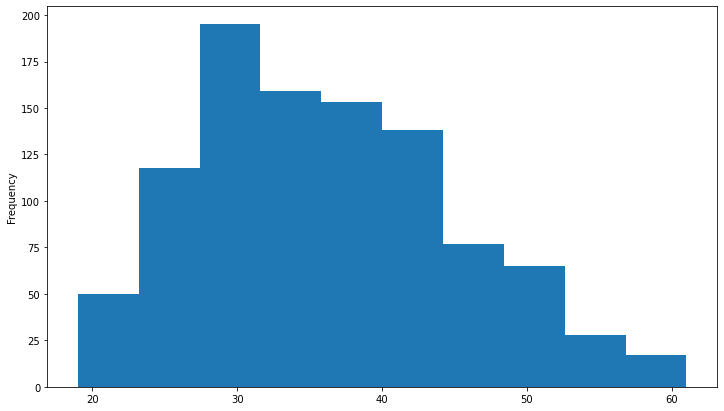

In [15]:
ad_data['Age'].plot.hist(figsize=(12,7))

<AxesSubplot:xlabel='Age', ylabel='Count'>

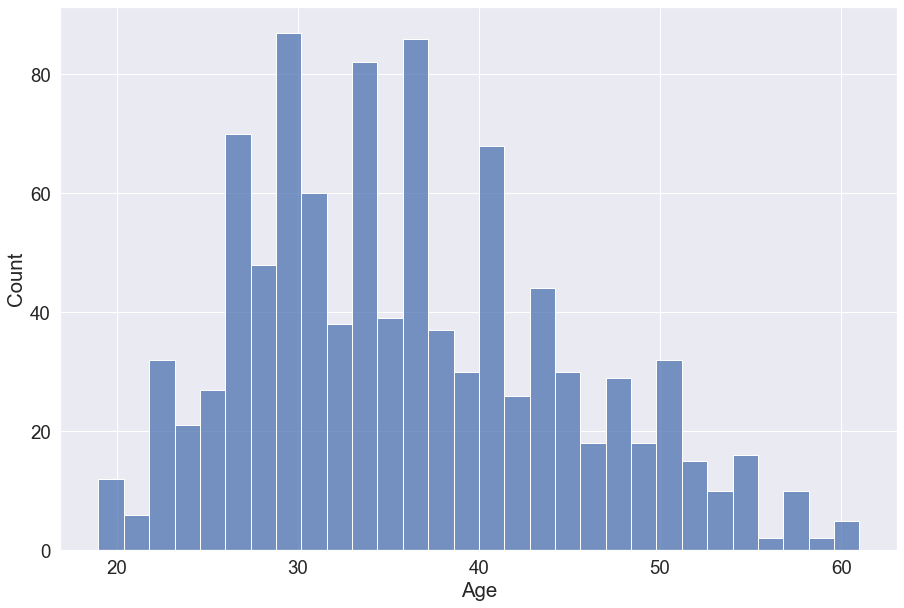

In [16]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(font_scale=1.7)
sns.histplot(ad_data['Age'],bins=30)

**A jointplot showing Area Income versus Age.**

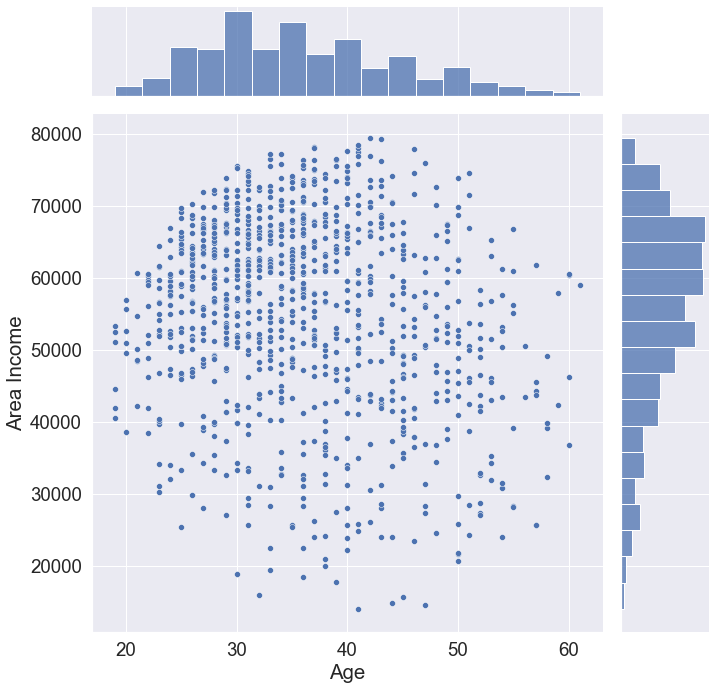

In [17]:
sns.jointplot(data=ad_data,x='Age',y='Area Income',height=10)

**A jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

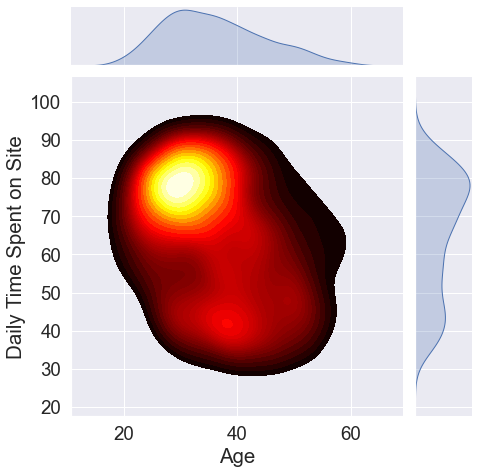

In [18]:
sns.jointplot(data=ad_data,x='Age',y='Daily Time Spent on Site',kind='kde',cmap='hot',fill=True,n_levels=30,height=7)

**A jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

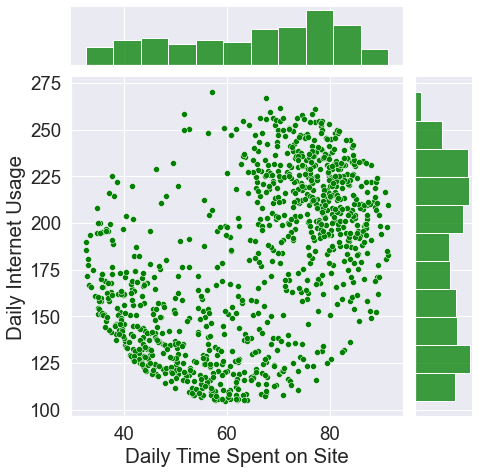

In [19]:
sns.jointplot(data=ad_data,x='Daily Time Spent on Site',y='Daily Internet Usage',color='green',height=7)

**A distplot of 'Daily Time Spent on Site'**

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Density'>

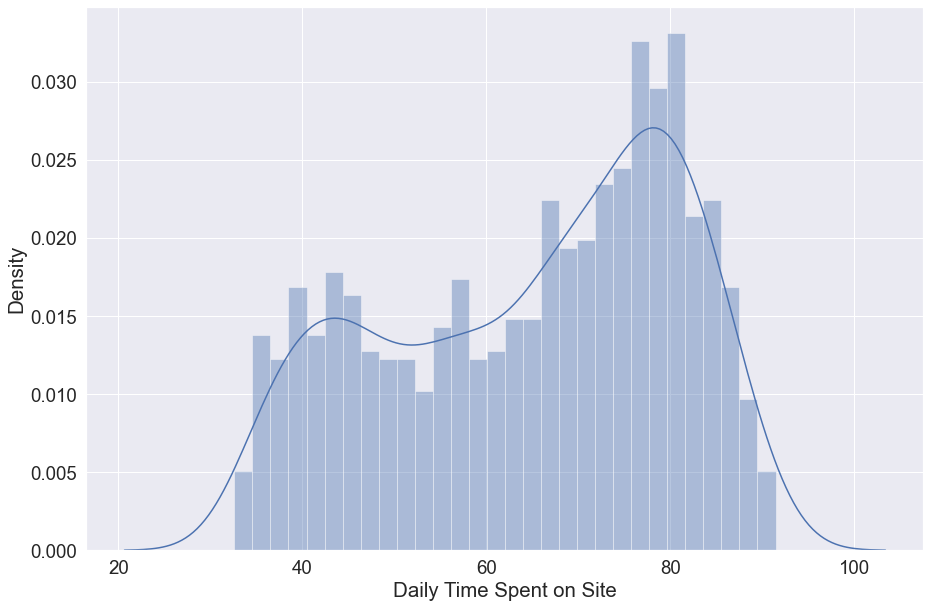

In [20]:
sns.distplot(ad_data['Daily Time Spent on Site'],bins=30)

**A histplot of 'Daily Time Spent on Site'**

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

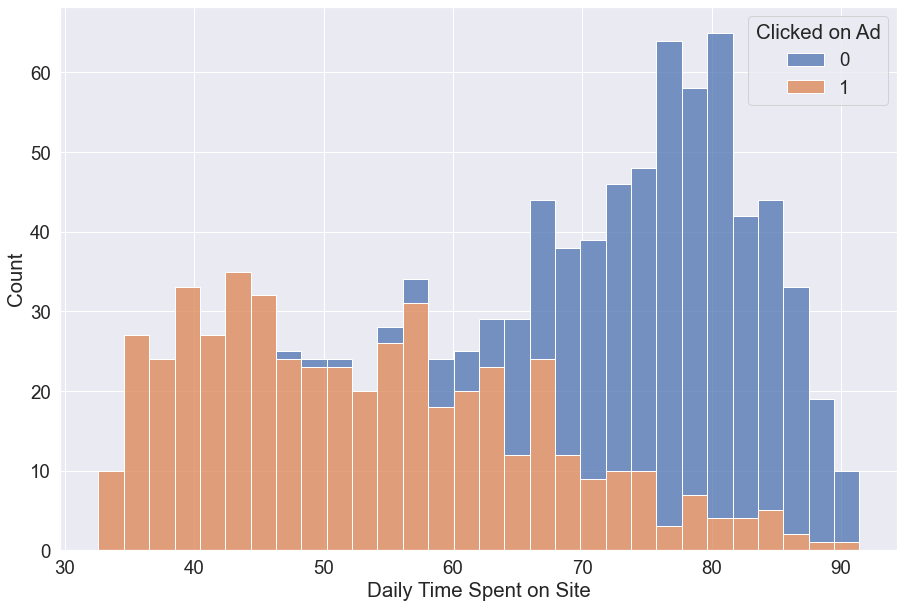

In [21]:
sns.histplot(data=ad_data,x='Daily Time Spent on Site',bins=30,hue='Clicked on Ad',multiple='stack')

**A pairplot with the hue defined by the 'Clicked on Ad' column feature.**

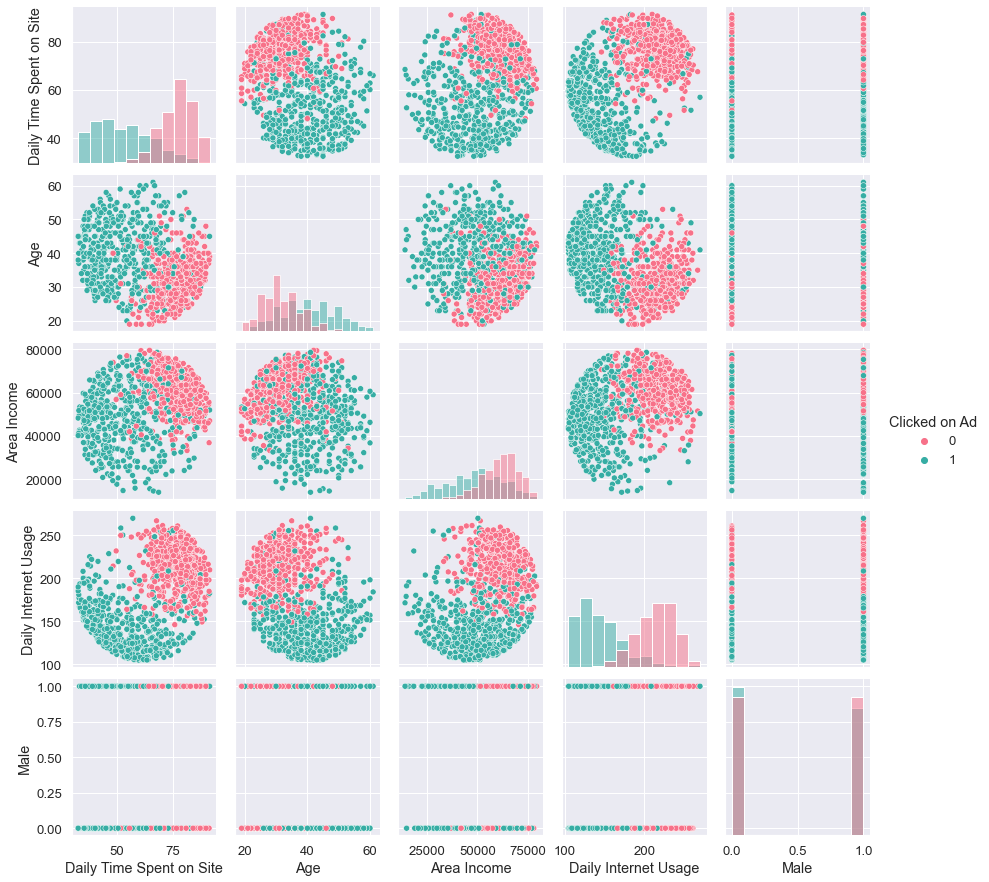

In [22]:
sns.set_theme(font_scale=1.2)
sns.pairplot(data=ad_data,hue='Clicked on Ad',palette='husl',diag_kind='hist')

## Feature Engineering of Timestamp

In [23]:
ad_data1=ad_data.copy()

In [24]:
ad_data1['Timestamp']=pd.to_datetime(ad_data1['Timestamp'])

In [25]:
ad_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [26]:
ad_data1['Hour']=ad_data1['Timestamp'].apply(lambda x:x.hour)
ad_data1['Minute']=ad_data1['Timestamp'].apply(lambda x:x.minute)
ad_data1['Date']=ad_data1['Timestamp'].apply(lambda x:x.date())
ad_data1['Day']=ad_data1['Date'].apply(lambda x:x.day)
ad_data1['Year']=ad_data1['Timestamp'].apply(lambda x:x.year)
ad_data1['Month']=ad_data1['Timestamp'].apply(lambda x:x.month)
ad_data1['Day of the Week']=ad_data1['Timestamp'].apply(lambda x:x.dayofweek)

In [27]:
ad_data1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Minute,Date,Day,Year,Month,Day of the Week
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,53,2016-03-27,27,2016,3,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,39,2016-04-04,4,2016,4,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,35,2016-03-13,13,2016,3,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,31,2016-01-10,10,2016,1,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,36,2016-06-03,3,2016,6,4


c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

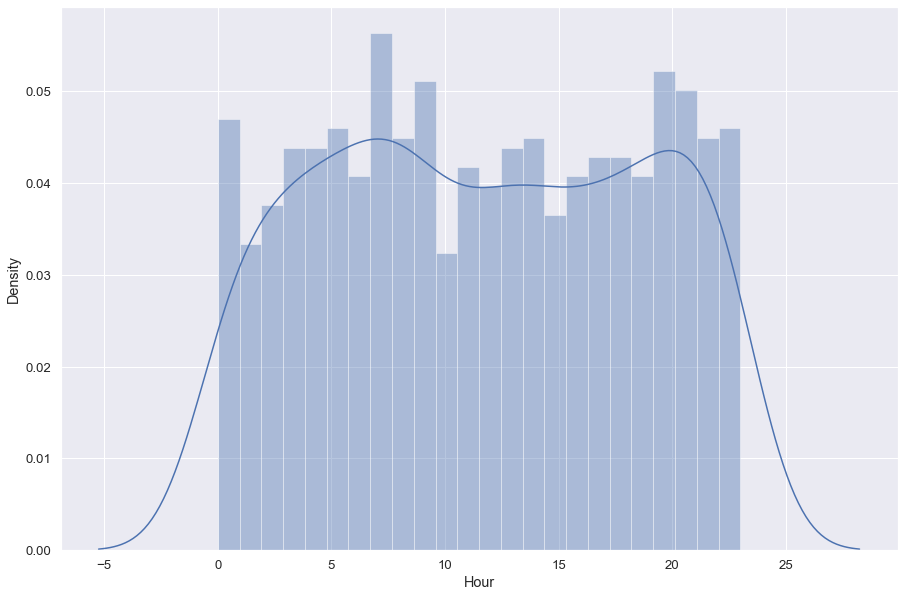

In [28]:
sns.distplot(ad_data1['Hour'],bins=24)

In [29]:
ad_data1['Minute'].nunique()

60

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Minute', ylabel='Density'>

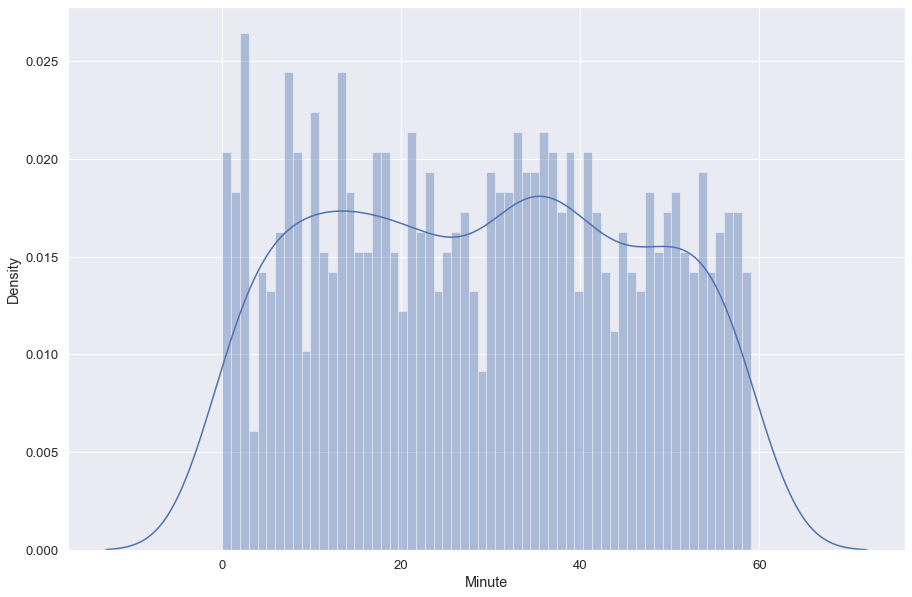

In [30]:
sns.distplot(ad_data1['Minute'],bins=60)

In [31]:
ad_data1['Year'].value_counts()

2016    1000
Name: Year, dtype: int64

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Month', ylabel='Density'>

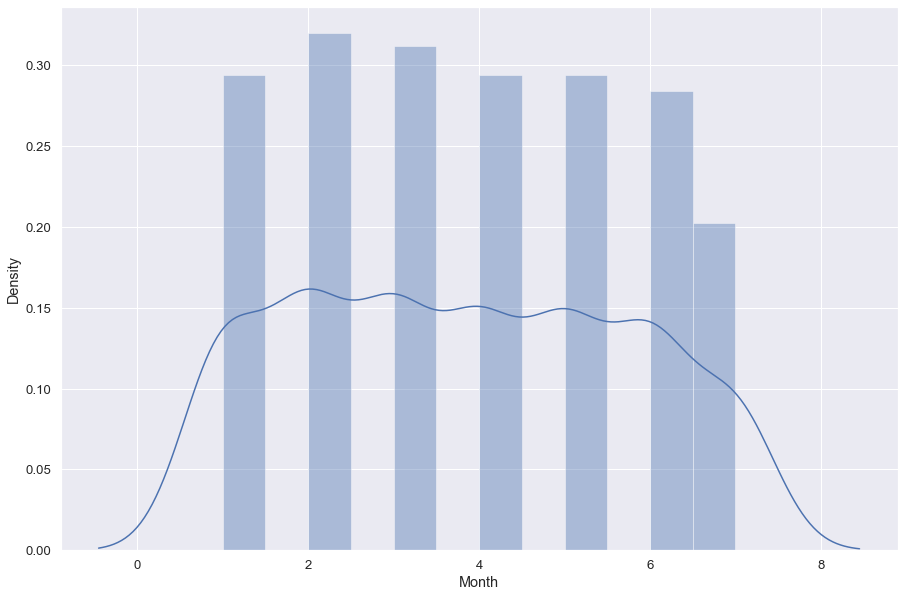

In [32]:
sns.distplot(ad_data1['Month'],bins=12)

In [33]:
ad_data1['Day'].nunique()

31

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day', ylabel='Density'>

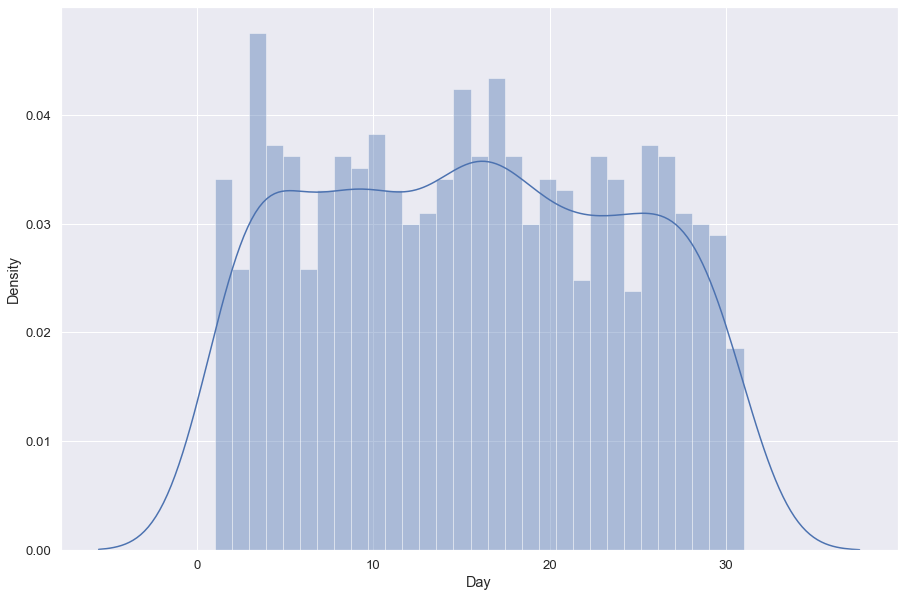

In [34]:
sns.distplot(ad_data1['Day'],bins=31)

In [35]:
ad_data1['Day of the Week'].nunique()

7

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day of the Week', ylabel='Density'>

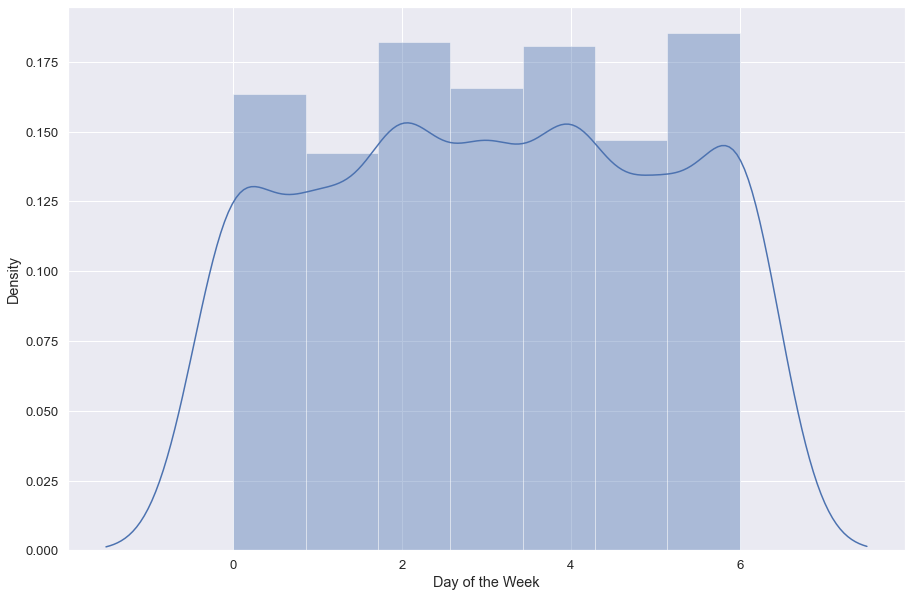

In [36]:
sns.distplot(ad_data1['Day of the Week'],bins=7)

<AxesSubplot:xlabel='Date'>

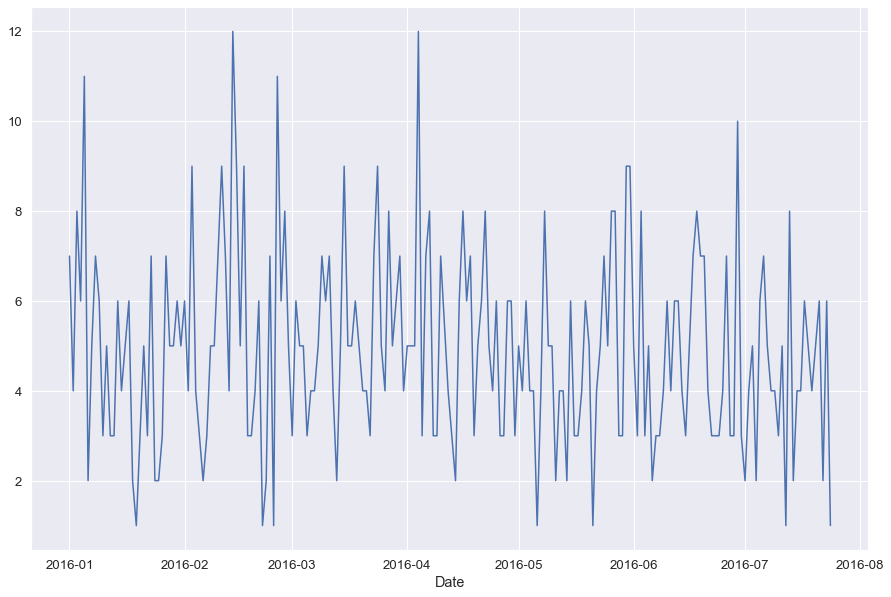

In [37]:
ad_data1.groupby('Date').count()['Age'].plot()

In [38]:
ad_data1.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Hour', 'Minute', 'Date', 'Day', 'Year',
       'Month', 'Day of the Week'],
      dtype='object')

In [39]:
ad_data1=ad_data1[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male','Clicked on Ad', 'Hour',
       'Month', 'Day of the Week']]

In [40]:
ad_data1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Month,Day of the Week
0,68.95,35,61833.90,256.09,0,0,0,3,6
1,80.23,31,68441.85,193.77,1,0,1,4,0
2,69.47,26,59785.94,236.50,0,0,20,3,6
3,74.15,29,54806.18,245.89,1,0,2,1,6
4,68.37,35,73889.99,225.58,0,0,3,6,4
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,21,2,3
996,51.30,45,67782.17,134.42,1,1,2,4,4
997,51.63,51,42415.72,120.37,1,1,17,2,0
998,55.55,19,41920.79,187.95,0,0,2,3,3


In [41]:
ad_data1.corr()['Clicked on Ad']

Daily Time Spent on Site   -0.748117
Age                         0.492531
Area Income                -0.476255
Daily Internet Usage       -0.786539
Male                       -0.038027
Clicked on Ad               1.000000
Hour                       -0.047431
Month                       0.016095
Day of the Week             0.002003
Name: Clicked on Ad, dtype: float64

### CONCLUSION 
**(  Hour, Month and Day of week ) has almost ZERO correlaion with 'CLicked on Ad'**

In [42]:
age_hour=ad_data1.pivot_table(values='Clicked on Ad', index='Hour',columns='Age',aggfunc='sum')
age_hour

Age,19,20,21,22,23,24,25,26,27,28,...,52,53,54,55,56,57,58,59,60,61
Hour,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,NaN,0.0,0.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,0.0,...,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Age', ylabel='Hour'>

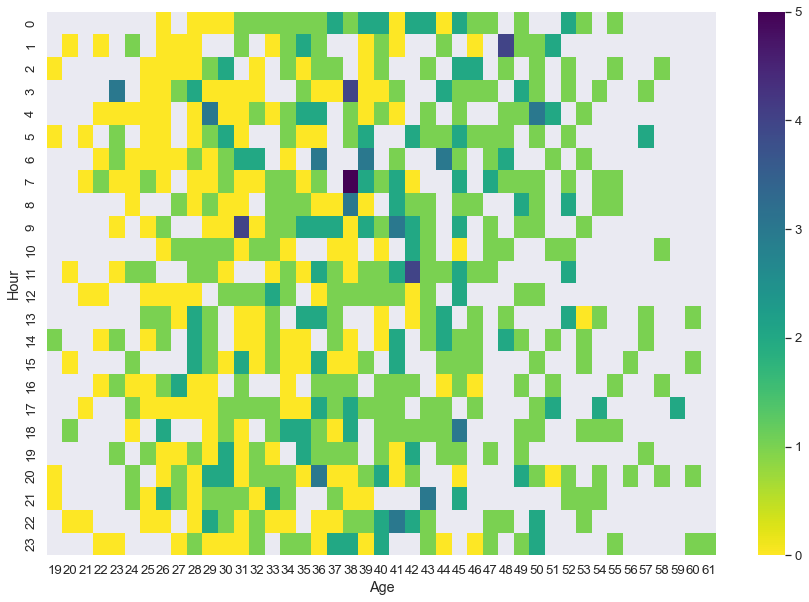

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(age_hour,cmap='viridis_r')

In [44]:
age_hour.fillna(0,inplace=True)
age_hour

Age,19,20,21,22,23,24,25,26,27,28,...,52,53,54,55,56,57,58,59,60,61
Hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1080x720 with 0 Axes>

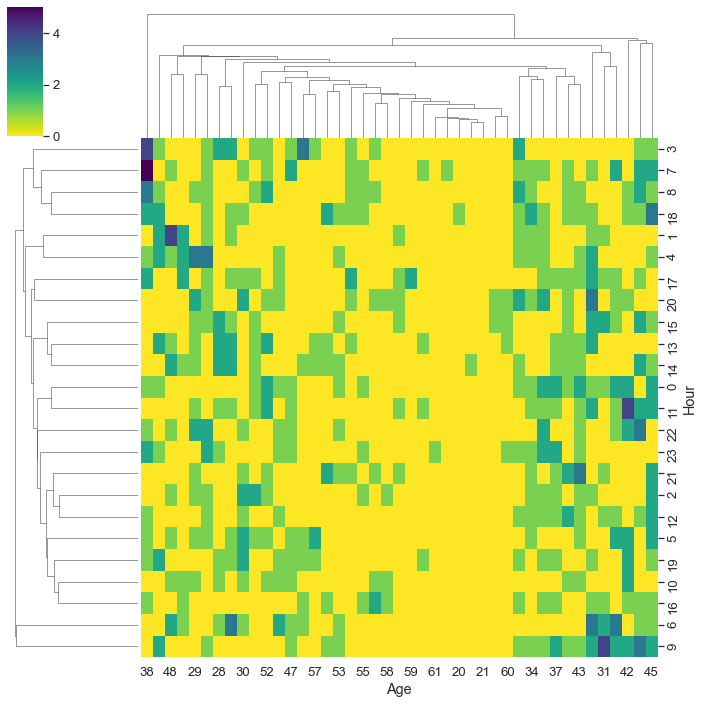

In [45]:
plt.figure(figsize=(15,10))
sns.clustermap(age_hour,cmap='viridis_r')

<AxesSubplot:xlabel='Age', ylabel='Hour'>

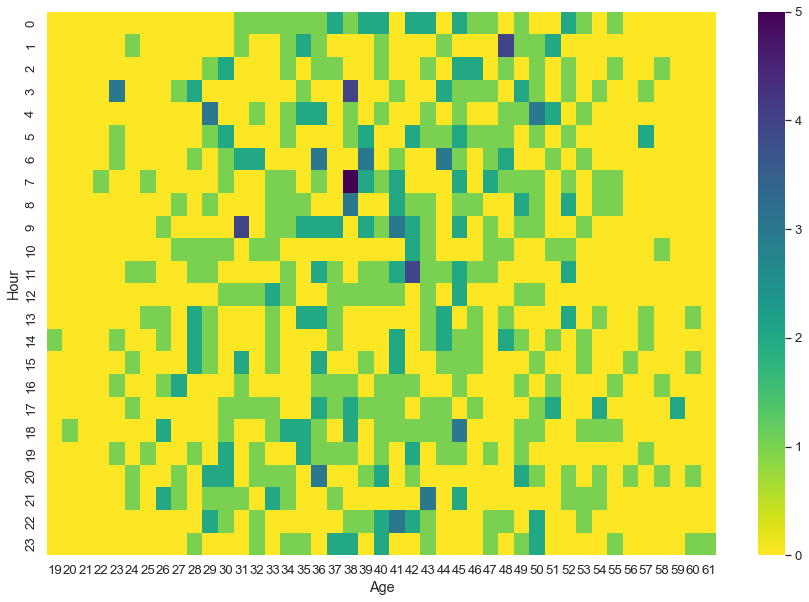

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(age_hour,cmap='viridis_r')

### No discernable clustering w.r.t Hour of usage

## Predictions and Evaluations

### Logistic Regression

In [47]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [48]:
ad_data_eval=ad_data.drop(['Ad Topic Line', 'City', 'Country',
       'Timestamp'],axis=1)

In [49]:
X=ad_data_eval.drop('Clicked on Ad',axis=1)

In [50]:
y=ad_data_eval['Clicked on Ad']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Train and fit a logistic regression model on the training set.**

In [52]:
log=LogisticRegression()

In [53]:
log.fit(X_train,y_train)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
pred=log.predict(X_test)

In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.96      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



In [56]:
print(confusion_matrix(y_test,pred))

[[170   1]
 [  6 153]]


**Coefficients**

In [57]:
log.coef_

array([[-1.50528652e-01,  1.29205761e-01, -9.08921564e-05,
        -5.90980158e-02,  1.37996528e+00]])

In [58]:
X_train.columns.values

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'], dtype=object)

In [59]:
coeff=pd.concat([pd.Series(X_train.columns.values),pd.Series(log.coef_.reshape(5))],axis=1)

In [60]:
coeff.rename(columns={0:'Columns',1:'Coeff'})

,Columns,Coeff
0,Daily Time Spent on Site,-0.150529
1,Age,0.129206
2,Area Income,-0.000091
3,Daily Internet Usage,-0.059098
4,Male,1.379965


### Linear Regression

In [61]:
lm=LinearRegression()

In [62]:
lm.fit(X_train,y_train)

LinearRegression()

**Coefficients**

In [63]:
lm.coef_

array([-1.24057962e-02,  8.30893676e-03, -5.85055609e-06, -5.53032004e-03,
       -2.40963213e-02])

In [64]:
coeff2=pd.concat([pd.Series(X_train.columns.values),pd.Series(lm.coef_.reshape(5))],axis=1)

In [65]:
coeff2.rename(columns={0:'Columns',1:'Coeff'})

,Columns,Coeff
0,Daily Time Spent on Site,-0.012406
1,Age,0.008309
2,Area Income,-0.000006
3,Daily Internet Usage,-0.005530
4,Male,-0.024096


In [66]:
predict=lm.predict(X_test)

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

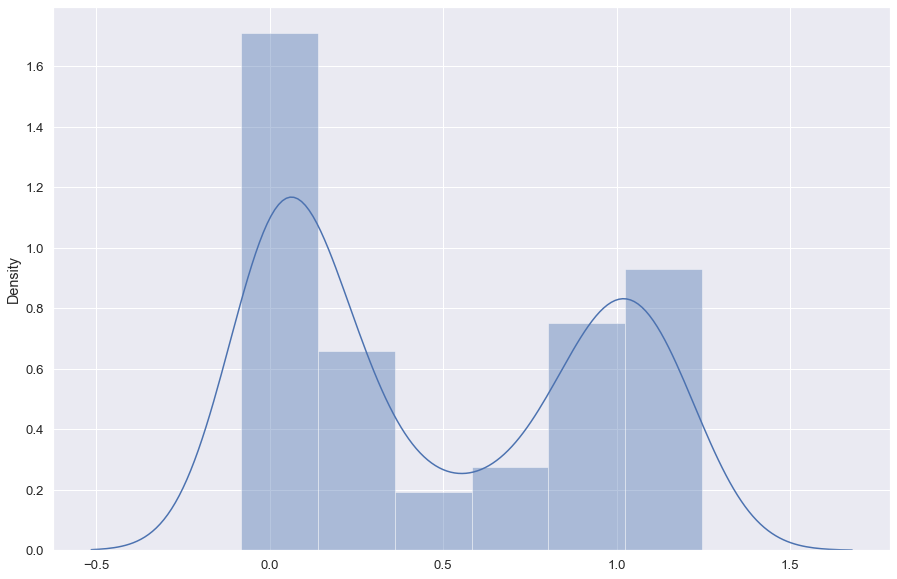

In [67]:
sns.distplot(predict)

<AxesSubplot:ylabel='Count'>

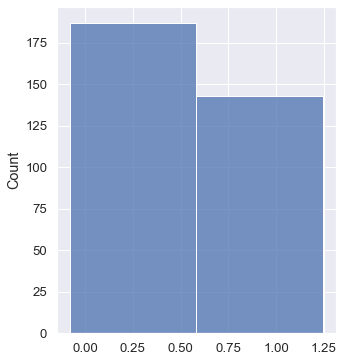

In [68]:
plt.figure(figsize=(5,6))
sns.histplot(predict,bins=2)

In [69]:
pred2=(predict>0.5)*1

In [70]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       171
           1       1.00      0.93      0.96       159

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [71]:
print(confusion_matrix(y_test,pred2))

[[171   0]
 [ 11 148]]


### Logistic regression slightly outperformed Linear regression